Welcome to the jupyter notebook! To run any cell, press `Shift+Enter` or `Ctrl+Enter`.

**IMPORTANT** : Please have a look at `Help->User Interface Tour` and `Help->Keyboard Shortcuts` in the toolbar above that will help you get started.

In [36]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Notebook Basics

A cell contains any type of python inputs (expression, function definitions, etc...). Running a cell is equivalent to input this block in the python interpreter. The notebook will print the output of the last executed line.

In [37]:
1

1

In [38]:
x = [2,3,4]

def my_function(l):
    l.append(12)

In [39]:
my_function(x)

x

[2, 3, 4, 12]

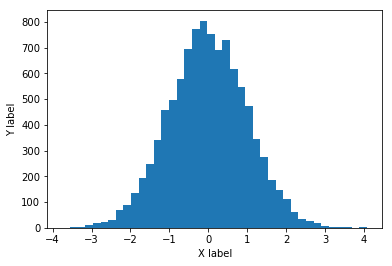

In [40]:
# Matplotlib is used for plotting, plots are directly embedded in the
# notebook thanks to the '%matplolib inline' command at the beginning
plt.hist(np.random.randn(10000), bins=40)
plt.xlabel('X label')
plt.ylabel('Y label')

Numpy Basics
============

**IMPORTANT** : the numpy documentation is quite good. The Notebook system is really good to help you. Use the Auto-Completion with `Tab`, and use `Shift+Tab` to get the complete documentation about the current function (when the cursor is between the parenthesis of the function for instance).

For example, you want to multiply two arrays. `np.mul` + `Tab` complete to the only valid function `np.multiply`. Then using `Shift+Tab` you learn `np.multiply` is actually the element-wise multiplication and is equivalent to the `*` operator.

In [41]:
np.multiply

<ufunc 'multiply'>

### Creation of arrays

Creating ndarrays (`np.zeros`, `np.ones`) is done by giving the shape as an iterable (List or Tuple). An integer is also accepted for one-dimensional array.

`np.eye` creates an identity matrix.

You can also create an array by giving iterables to it.

(NB : The random functions `np.random.rand` and `np.random.randn` are exceptions though)

In [42]:
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

In [43]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [44]:
np.array([[1,3,4],[2,5,6]])

array([[1, 3, 4],
       [2, 5, 6]])

In [45]:
np.arange(3)  # NB : np.array(range(10)) is a slightly more complicated equivalent

array([0, 1, 2])

In [46]:
np.random.randn(3, 4) # normal distributed values

array([[-0.29390027,  0.00632669,  0.34266576, -0.31613068],
       [ 1.58593971,  0.56554094,  0.73641794, -0.20915688],
       [-1.08613707,  0.02544757, -0.22855594, -0.63697009]])

In [47]:
# 3-D tensor
np.ones((2, 4, 2))


array([[[ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.]],

       [[ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.],
        [ 1.,  1.]]])

### ndarray basics

A ndarray python object is just a reference to the data location and its characteristics.

All numpy operations applying on an array can be called np._function_(a) or a._function_() (i.e `np.sum(a)` or `a.sum()`)

It has an attribute `shape` that returns a tuple of the different dimensions of the ndarray. It also has an attribute `dtype` that describes the type of data of the object (default type is `float64`)

**WARNING** because of the object structure, unless you call `copy()` copying the reference is not copying the data.

In [48]:
tensor_3.shape, tensor_3.dtype

NameError: name 'tensor_3' is not defined

In [ ]:
a = np.array([[1.0, 2.0], [5.0, 4.0]])
b = np.array([[4, 3], [2, 1]])
(b.dtype, a.dtype) # each array has a data type (casting rules apply for int -> float)

In [ ]:
np.array(["Mickey", "Mouse"]) # can hold more than just numbers

In [ ]:
a = np.array([[1.0, 2.0], [5.0, 4.0]])
b = a  # Copying the reference only
b[0,0] = 3
a

In [ ]:
a = np.array([[1.0, 2.0], [5.0, 4.0]])
b = a.copy()  # Deep-copy of the data
b[0,0] = 3
a

#### Basic operators are working element-wise (+, -, *, /)

When trying to apply operators for arrays with different sizes, they are very specific rules that you might want to understand in the future : http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

In [ ]:
np.ones((2, 4)) * np.random.randn(2, 4)

In [ ]:
np.eye(3) - np.ones((3,3))

In [ ]:
print(a)
print(a.shape)  # Get shape
print(a.shape[0])  # Get size of first dimension

#### Accessing elements and slicing

For people uncomfortable with the slicing of arrays, please have a look at the 'Indexing and Slicing' section of http://www.python-course.eu/numpy.php

In [ ]:
print(a[0])  # Get first line (slice for the first dimension)
print(a[:, 1])  # Get second column (slice for the second dimension)
print(a[0, 1])  # Get first line second column element

#### Changing the shape of arrays

`ravel` creates a flattened view of an array (1-D representation) whereas `flatten` creates flattened copy of the array.

`reshape` allows in-place modification of the shape of the data. `transpose` shuffles the dimensions.

`np.newaxis` allows the creation of empty dimensions.

In [ ]:
a = np.array([[1.0, 2.0], [5.0, 4.0]])
b = np.array([[4, 3], [2, 1]])
v = np.array([0.5, 2.0])

In [ ]:
print(a)
print(a.T)  # Equivalent : a.tranpose(), np.transpose(a)
print(a.ravel())

In [ ]:
c = np.random.randn(4,5)
print(c.shape)
print(c[np.newaxis].shape)  # Adding a dimension
print(c.T.shape)  
print(c.reshape([10,2]).shape)
print(c)
print(c.reshape([10,2]))

In [ ]:
a.reshape((-1, 1)) # a[-1] means 'whatever needs to go there'

#### Reduction operations

Reduction operations (`np.sum`, `np.max`, `np.min`, `np.std`) work on the flattened ndarray by default. You can specify the reduction axis as an argument

In [ ]:
np.sum(a), np.sum(a, axis=0), np.sum(a, axis=1) # reduce-operations reduce the whole array if no axis is specified

#### Linear-algebra operations

In [ ]:
np.dot(a, b) # matrix multiplication

In [ ]:
# Other ways of writing matrix multiplication, the '@' operator for matrix multiplication
# was introduced in Python 3.5
np.allclose(a.dot(b), a @ b)

In [ ]:
# For other linear algebra operations, use the np.linalg module
np.linalg.eig(a)  # Eigen-decomposition

In [ ]:
print(np.linalg.inv(a))  # Inverse
np.allclose(np.linalg.inv(a) @ a, np.identity(a.shape[1]))  # a^-1 * a = Id

In [ ]:
np.linalg.solve(a, v) # solves ax = v

#### Grouping operations

Grouping operations (`np.stack`, `np.hstack`, `np.vstack`, `np.concatenate`) take an iterable of ndarrays and not ndarrays as separate arguments : np.concatenate([a,b]) and not np.concatenate(a,b).

In [ ]:
np.hstack([a, b])

In [ ]:
np.vstack([a, b])

In [ ]:
np.vstack([a, b]) + v # broadcasting

In [ ]:
np.hstack([a, b]) + v # does not work

In [ ]:
np.hstack([a, b]) + v.T # transposing a 1-D array achieves nothing

In [ ]:
np.hstack([a, b]) + v.reshape((-1, 1)) # reshaping to convert v from a (2,) vector to a (2,1) matrix

In [ ]:
np.hstack([a, b]) + v[:, np.newaxis] # equivalently, we can add an axis

## Working on subset of the elements

We have two ways in order to apply operations on subparts of arrays (besides slicing).

#### Slicing reminders

In [50]:
r = np.random.randint(0,10)

In [51]:
r

4

In [ ]:
r[0], r[1]

In [ ]:
r[0:2]

In [ ]:
r[1][2] # regular python

In [ ]:
r[1, 2] # numpy

In [ ]:
r[:, 1:3]

#### Binary masks

Using logical operations on arrays give a binary mask. Using a binary mask as indexing acts as a filter and outputs just the very elements where the value is True. This gives a memoryview of the array that can get modified.

In [ ]:
r > 5  # Binary element-wise result

In [ ]:
r[r > 5]  # Use the binary mask as filter

In [ ]:
r[r > 5] = 999  # Modify the corresponding values with a constant

In [ ]:
r

#### Working with indices

The second way to work on subpart of arrays are through indices. Usually you'd use one array per dimension with matching indices.

**WARNING** : indices are usually slower than binary masks because it is harder to be parallelized by the underlying BLAS library.

In [52]:
# Get the indices where the condition is true, gives a tuple whose length
# is the number of dimensions of the input array
np.where(r == 999)

(array([], dtype=int64),)

In [ ]:
print(np.where(np.arange(10) < 5))  # Is a 1-tuple
np.where(np.arange(10) < 5)[0]  # Accessing the first element gives the indices array

In [ ]:
np.where(r == 999, -10, r+1000)  # Ternary condition, if True take element from first array, otherwise from second

In [ ]:
r[(np.array([1,2]), np.array([2,2]))]  # Gets the view corresponding to the indices. NB : iterable of arrays as indexing

# Working with arrays, examples

Thanks to all these tools, you should be able to avoid writing almost any for-loops which are extremely costly in Python (even more than in Matlab, because good JIT engines are yet to come). In case you **really** need for-loops for array computation (usually not needed but it happens) have a look at http://numba.pydata.org/ (_For advanced users_)

#### Counting the number of positive elements that satisfy a condition

In [ ]:
numbers = np.random.randn(1000, 1000)

In [ ]:
%%timeit  # Naive version
my_sum = 0
for n in numbers.ravel():
    if n>0:
        my_sum += 1

In [ ]:
%timeit np.sum(numbers > 0)

#### Compute polynomial for a lot of values

In [ ]:
X = np.random.randn(10000)

In [ ]:
%%timeit  # Naive version
my_result = np.zeros(len(X))
for i, x in enumerate(X.ravel()):
    my_result[i] = 1 + x + x**2 + x**3 + x**4

In [ ]:
%timeit 1 + X + X**2 + X**3 + X**4

## SciPy

SciPy is a collection of libraries more specialized than Numpy. It is the equivalent of toolboxes in Matlab.

Have a look at their collection: http://docs.scipy.org/doc/scipy/reference/

Many traditionnal functions are coded there.

In [ ]:
X = np.random.randn(1000)

In [ ]:
from scipy.fftpack import fft
plt.plot(fft(X).real)